In [1]:
%run Olympics_Master.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
[1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


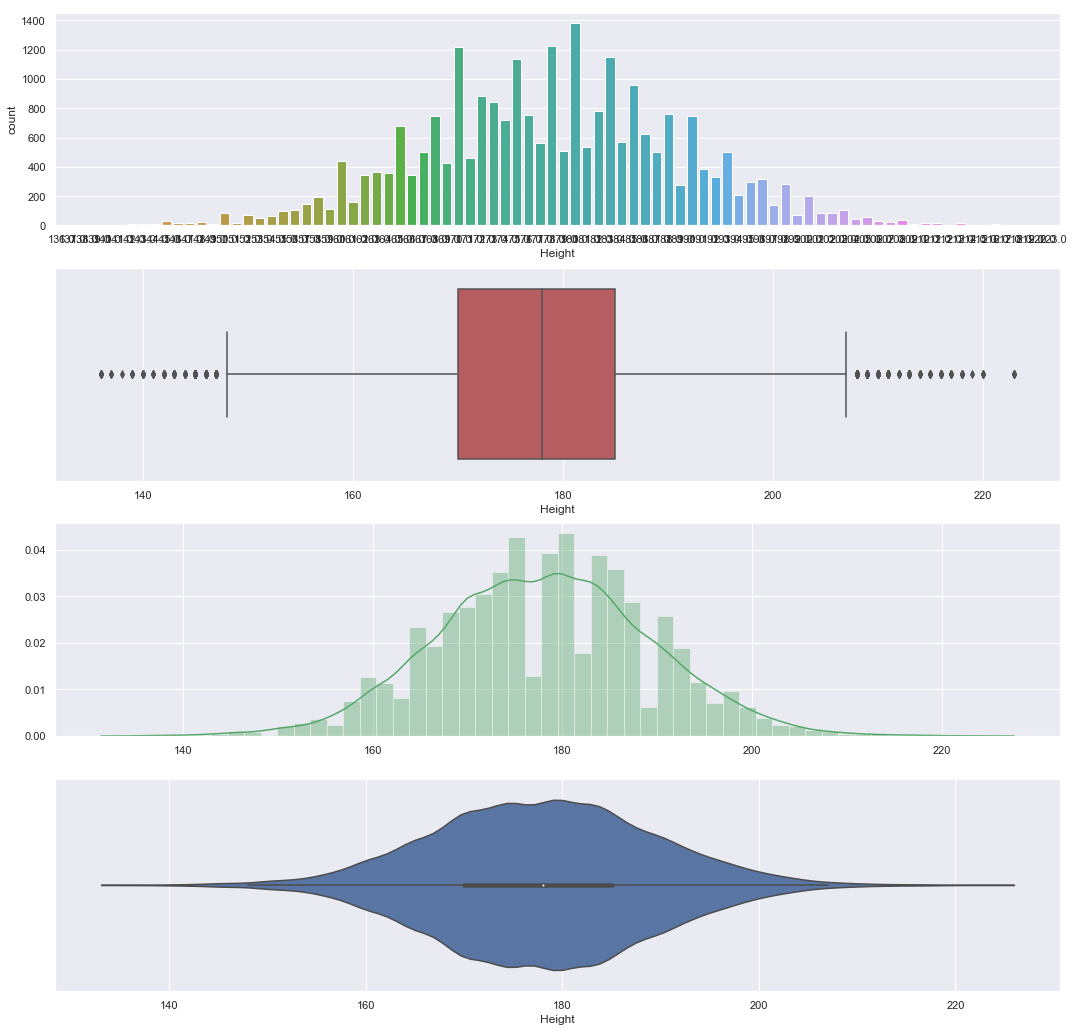

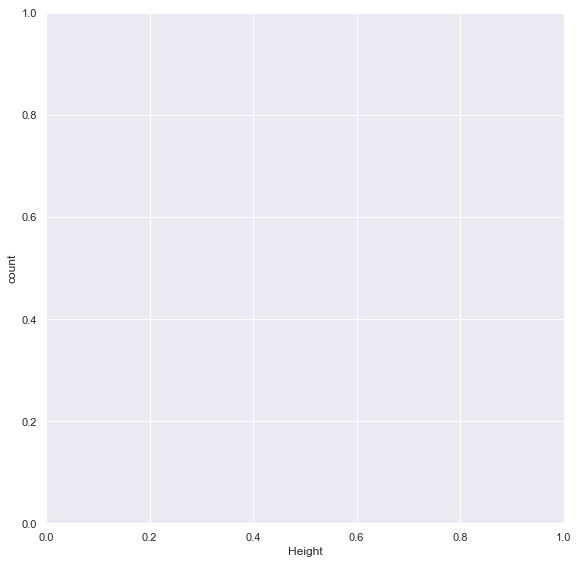

0    64.0
1    64.0
2    64.0
3    64.0
4    64.0
Name: Weight, dtype: float64
float64
1
[ 64.   72.   90.   87.   49.   80.   83.   86.   82.   55.   67.   60.
  85.   79.   96.   97.   88.   56.   59.   91.   62.   63.  104.   84.
 125.   50.   48.   58.   78.   40.   68.   92.   75.   61.   89.   93.
  77.   46.   81.   52.   73.   54.   57.   51.  120.   74.   65.   70.
 100.   76.   66.   47.   69.5 102.   53.   45.  105.   95.   69.  156.
  71.  130.   98.  160.  110.  106.   44.  141.  118.  101.   94.  109.
  74.5 121.  135.  111.   39.   99.   36.  114.  132.   65.5  43.   42.
  59.5 116.  108.   35.  117.  103.   58.5  32.  113.  146.5 116.5 140.
 115.   38.  101.5 154.  136.  127.  107.  170.  126.  146.  122.   55.5
  41.  123.   34.  150.  109.5  37.   70.5  71.5  30.   76.5 112.   33.
 129.  137.   67.5 128.   54.5  63.5 134.  147.  100.5  78.5  82.5  77.5
  53.5  83.5 124.   81.5  57.5  89.5 102.5 167.   91.5  68.5  73.5  85.5
 108.5 138.  142.   60.5  66.5 135.5  31.  1

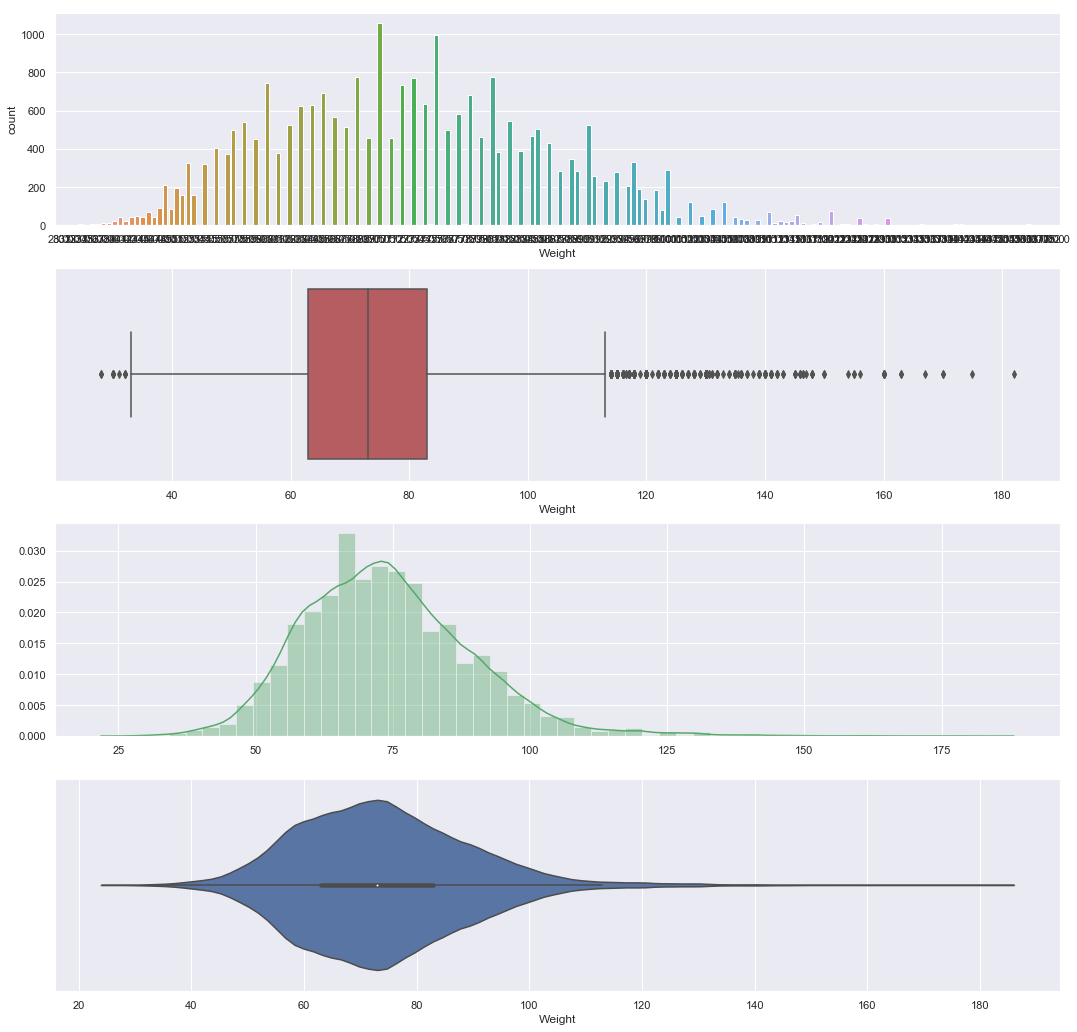

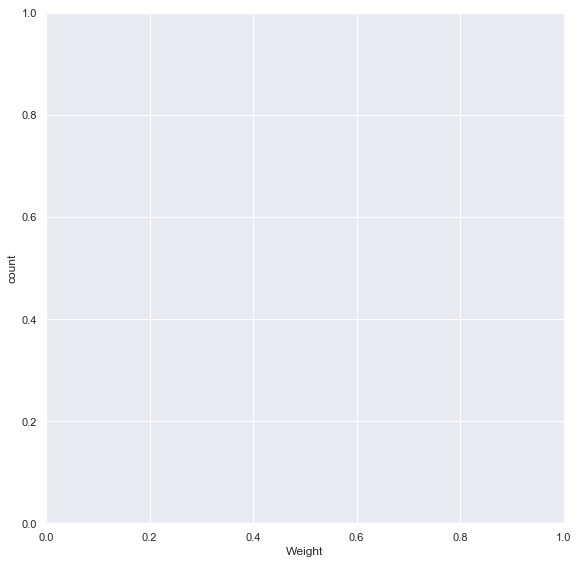

          BMI
0   20.897959
1   20.897959
2   20.897959
3   20.897959
4   20.897959
5   20.156211
6   19.321338
7   22.956841
8   23.116165
9   17.998163
10  24.968010
11  25.617284
12  25.963048
13  25.963048
14  25.963048
          BMI
0   20.897959
1   20.897959
2   20.897959
3   20.897959
4   20.897959
5   20.156211
6   19.321338
7   22.956841
8   23.116165
9   17.998163
10  24.968010
11  25.617284
12  25.963048
13  25.963048
14  25.963048


In [2]:
%run OLYMPICS.ipynb

In [3]:
# events = pd.read_csv('athlete_events.csv')
# events.head()

In [4]:
# events_weight = olympics_var(events, "Weight")

In [5]:
# events_height = olympics_var(events, "Height")

In [6]:
# bmi(events_weight, events_height)

In [7]:
print(df.BMI.head())
df.head(50)

0    19.321338
1    22.956841
2    23.116165
3    17.998163
4    24.968010
Name: BMI, dtype: float64


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,GDP,Medal Values,BMI
0,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,Norway,1.635178e+11,1,19.321338
1,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,Italy,1.858913e+12,1,22.956841
2,63,Jos Luis Abajo Gmez,M,30.0,194.0,87.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Men's epee, Individual",Bronze,Spain,1.635015e+12,1,23.116165
3,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,Azerbaijan,3.784772e+10,1,17.998163
4,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia,1.660844e+12,1,24.968010
5,72,Aleksey Aleksandrovich Abalmasov,M,28.0,180.0,83.0,Belarus,BLR,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold,Belarus,6.076348e+10,1,25.617284
6,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold,France,2.923466e+12,1,25.963048
7,73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Gold,France,2.681416e+12,1,25.963048
8,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver,France,2.465454e+12,1,25.963048
9,76,Jouan Patrice Abanda Etong,M,22.0,185.0,82.0,Cameroon,CMR,2000 Summer,2000,Summer,Sydney,Football,Football Men's Football,Gold,Cameroon,1.008394e+10,1,23.959094


In [8]:
## Linear regression function for multi-variate analysis

def LinearReg(x, y):
    x_1 = pd.concat([y_clean, x_clean], axis = 1, join_axes = [y_clean.index])
    f, axes = plt.subplots(2, 1, figsize=(12, 8))
    sb.heatmap(x_1.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
    sb.pairplot(data = x_1, dropna = True)
    # create the linear regression object
    linreg = LinearRegression()         
    # train the linear regression model
    linreg.fit(x_clean, y_clean)        
    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    # Print the Coefficients against Predictors
    print(pd.DataFrame(list(zip(x_clean.columns, linreg.coef_[0])), columns = [x_clean.index, "Coefficients"]))


In [9]:
# LinearReg(df.Weight, df.Height)

In [26]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sb
%matplotlib inline

# Extract Response and Predictors
y1 = pd.DataFrame(df["Medal Values"])
x1 = pd.DataFrame(df[["Age", "BMI", "GDP"]])
y = y1.fillna(0)
x = x1.fillna(0)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(x, y)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# # Plot the Predictions vs the True values
# f, axes = plt.subplots(1, 2, figsize=(24, 12))
# axes[0].scatter(x, y, color = "blue")
# axes[0].plot(x, x, 'w-', linewidth = 1)
# axes[0].set_xlabel("True values of the Response Variable (Train)")
# axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
# axes[1].scatter(x, x, color = "green")
# axes[1].plot(x, x, 'w-', linewidth = 1)
# axes[1].set_xlabel("True values of the Response Variable (Test)")
# axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
# plt.show()

# Visualizing 4-D mix data using scatter plots
# leveraging the concepts of hue and depth
fig = plt.figure(figsize=(18, 14))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Type', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(df["BMI"])
ys = list(df["GDP"])
zs = list(df["Age"])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == "Bronze" else 'yellow' if wt == "Gold" else 'white' for wt in list(df["Medal"])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=300)

ax.set_xlabel('BMI')
ax.set_ylabel('GDP')
ax.set_zlabel('Age')

Intercept of Regression 	: b =  [1.11439454]
Coefficients of Regression 	: a =  [[ 1.24596117e-03 -7.73341917e-04  2.49616195e-15]]

  Predictors  Coefficients
0        Age  1.245961e-03
1        BMI -7.733419e-04
2        GDP  2.496162e-15



In [11]:
print(x.shape)
print(y.shape)

(14834, 3)
(14834, 1)


0    19.321338
1    22.956841
2    23.116165
3    17.998163
4    24.968010
Name: BMI, dtype: float64
float64
1
[19.321338   22.95684114 23.11616537 ... 19.89592899 32.74416118
 24.19829981]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,BMI
0,19.321338
1,22.956841
2,23.116165
3,17.998163
4,24.968010
5,25.617284
6,25.963048
7,25.963048
8,25.963048
9,23.959094


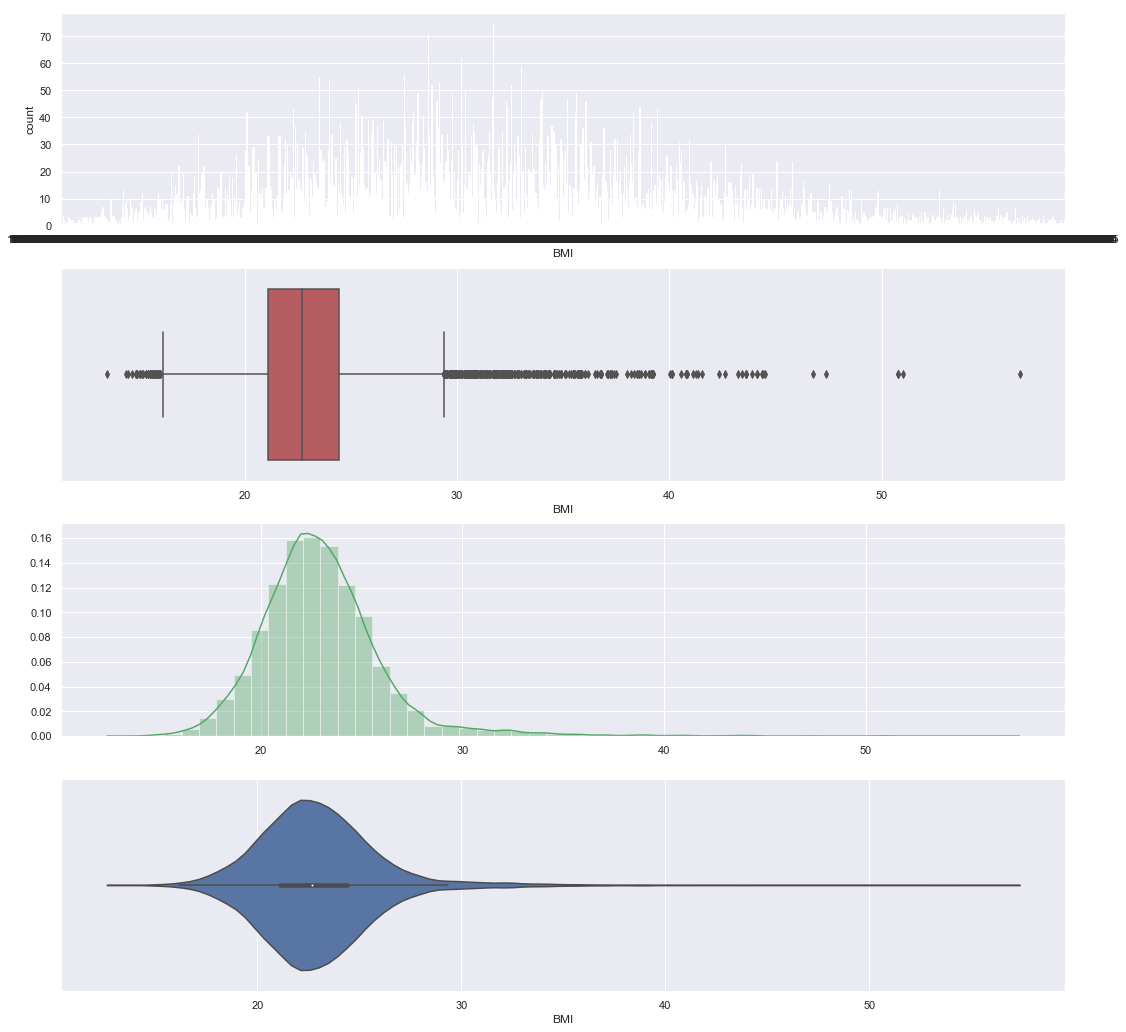

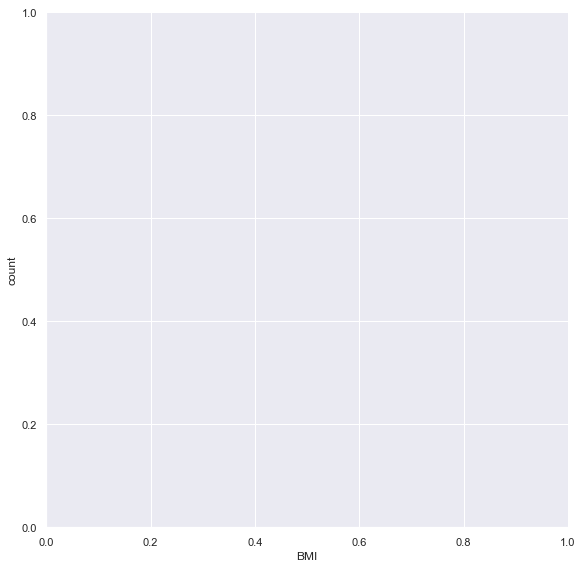

In [27]:
 olympics_var(df, "BMI")

0    1.635178e+11
1    1.858913e+12
2    1.635015e+12
3    3.784772e+10
4    1.660844e+12
Name: GDP, dtype: float64
float64
1
[1.63517783e+11 1.85891316e+12 1.63501538e+12 3.78477157e+10
 1.66084441e+12 6.07634831e+10 2.92346565e+12 2.68141611e+12
 2.46545398e+12 1.00839377e+10 6.40998292e+11 1.22749280e+13
 2.32134607e+11 1.71635463e+11 5.91016691e+11 3.87249454e+10
 8.88667913e+11 1.30892935e+12 1.14176000e+12 4.36443281e+11
 1.31580699e+12 1.05533483e+12 1.47185820e+13 3.55372558e+11
 3.70705590e+09 5.13040773e+09 1.37603745e+10 3.17674959e+09
 5.27261720e+09 1.02847790e+13 5.16133617e+09 1.04929931e+10
 1.82428876e+12 8.24239210e+09 7.64335657e+11 2.21025698e+12
 1.28316299e+12 1.20461644e+12 2.79372758e+11 5.64947711e+11
 3.81705425e+11 1.23725502e+12 2.12411224e+12 3.86547277e+10
 8.17490064e+10 2.08181627e+11 1.75632157e+11 6.41390160e+09
 2.57052962e+10 3.37110694e+10 1.36048324e+10 3.61558037e+11
 6.08063000e+10 9.43370507e+10 4.61487098e+11 2.66208517e+12
 2.64789865e+12 1.86

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


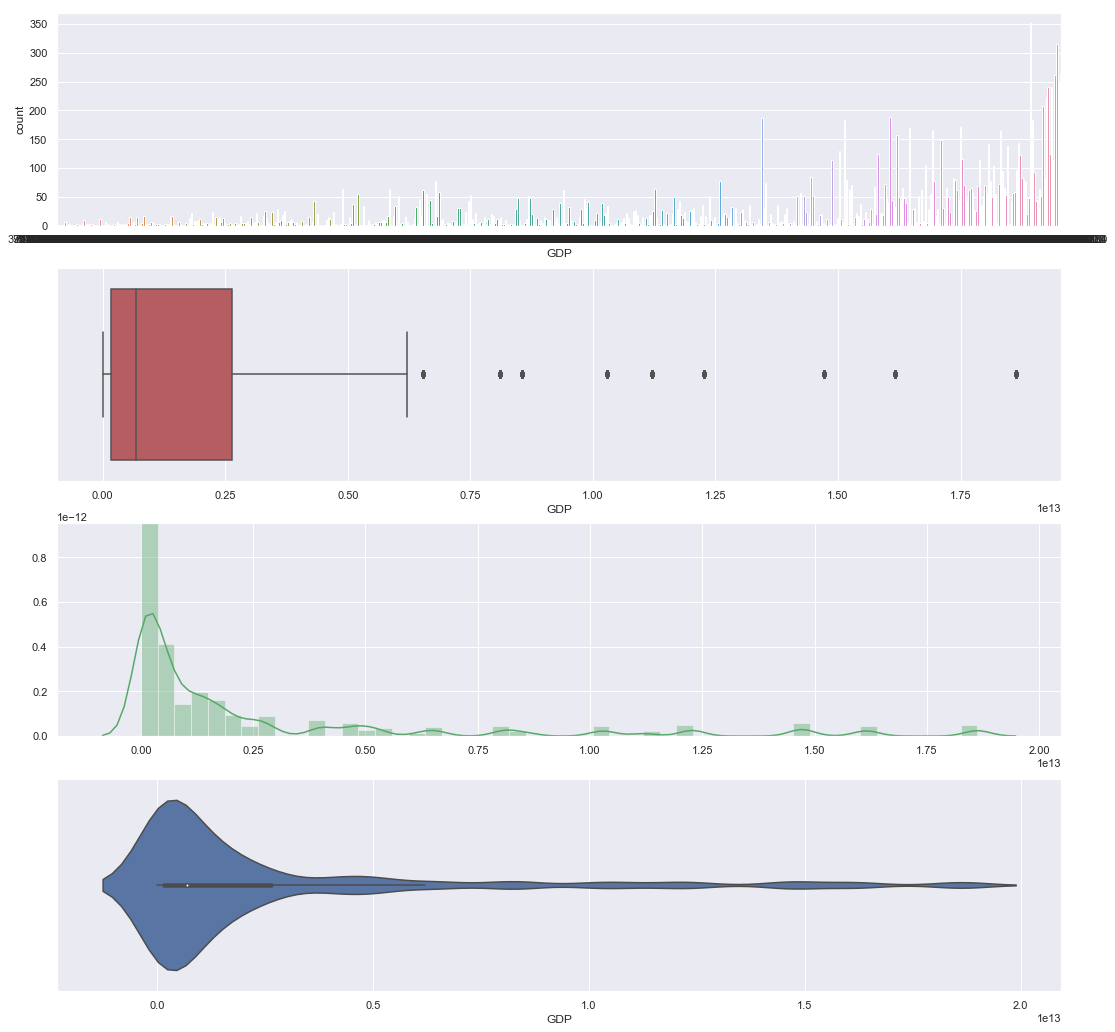

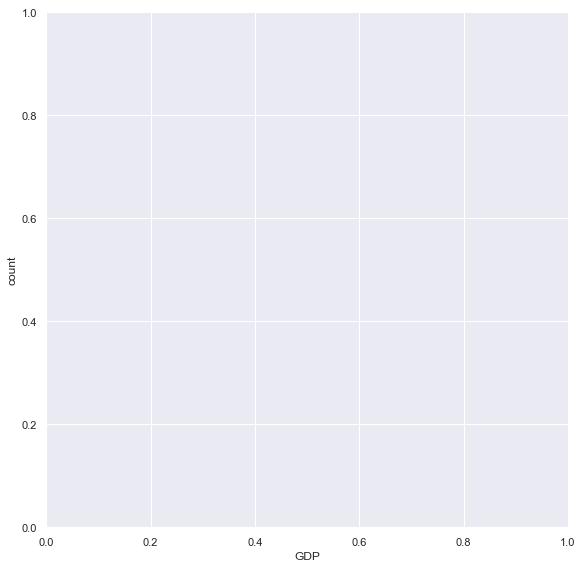

In [22]:
df_gdp = olympics_var(df, "GDP")